In [132]:
%matplotlib inline
import numpy as np
from numpy import linalg as LA
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from funciones_complementarias import *


In [133]:
#Defino funciones auxiliares:

def norm_col(x):
    y = LA.norm(x,axis=0)
    return y




def flatten(x): #debe ser una matriz x
    y = np.reshape(x,x.shape[0]*x.shape[1])
    return y

In [134]:
class PerceptronSOM:
    def __init__(self,long_input,filas_output,columnas_output):
        self.long_input = long_input
        self.filas_output =  filas_output
        self.columnas_output = columnas_output
        #self.w_= []
        #peso = np.random.rand(l_neuronasPorCapa[i],l_neuronasPorCapa[i-1])       
        peso = np.random.uniform(low=-0.6, high=0.6, size=(self.long_input,self.filas_output*self.columnas_output))
        peso = np.matrix(peso)
        self.w_ = peso
        
# Funciones propias de SOM
    def mascara_min_dist(self,x_): # sea x un vector de 1xN. W es la matriz de pesos con dimension Nx(M1*M2)
        x = np.matrix(x_)
        y_ = norm_col(x.T-pm.w_) # calculo la distancia de x a cada columna de la matriz de pesos, obtengo un vector con esas distancias, o sea el vector tendra 
        # dimension 1xcolumnas.
        return (y_==np.min(y_))*1
    
    def coord(self, x):
        pos = np.where(x==1)[0][0]
        coord_col =pos%pm.columnas_output
        coord_fila = int(np.ceil(pos/pm.columnas_output))
        l=[]
        l.append(coord_fila)
        l.append(coord_col)
        return l

    
    def vecino(self, position , sigma):
        filas = self.filas_output
        columnas = self.columnas_output
        d_ = np.zeros(filas*columnas)
        d = np.matrix(d_)
        d = d.reshape(1,filas*columnas)
        p = position
        for i in range(0,filas):
            for j in range(0,columnas):
                ij2p = (i-p[0])**2 + (j-p[1])**2
                dist_ij2p = np.sqrt(ij2p)
                dist_ij2p = dist_ij2p * 0.5 *(1/sigma)
                d[0,i*j] = np.e**(-dist_ij2p)
        return d

    def correccion(self,x,eta_act,sigma_act):
        y = self.mascara_min_dist(x)
        p = self.coord(y)
        d = self.vecino(p,sigma_act)
        x_ = np.matrix(x)
        y_ = x_ * self.w_
        delta = np.multiply(y_,flatten(d))
        self.w_ += eta_act*delta
        return self
            
    def train_som(self, trainX, eta=0.01, sigma = 0.1,t_eta = 1, t_sigma = 1, epochs=100):
        self.eta = eta
        self.epochs = epochs
        for _ in range(self.epochs):
            eta_act = eta*np.e**(-_/t_eta)
            sigma_act = sigma*np.e**(-_/t_eta)
            cant_entr = len(trainX)
            for i in (0,449):
                x = trainX[i]
                self.correccion(x,sigma_act,eta_act)
        return self
    




In [149]:

print "Importo los datos"
import pandas as pd
df1 = pd.read_csv('tp2_training_dataset.csv', header=None)

print "Centro los datos y separo la columna de clases"
df2 = df1.copy()
df2_sin_clase = df2.drop(0,1)
clases = df2[0]
#df_centrado = centrar(df2)
df_centrado = centrar(df2_sin_clase)

print "Separo los datos de entrenamiento y de validacion:"
#Separo datos de entrenamiento, de validacion y de testing. Validacion me servira para evaluar mis pruebas y con el grupo de datos testing reportare la rta final del tp en cada caso.
proporcion_entrenamiento = 0.8
cant_train = int(len(df1)*proporcion_entrenamiento)
print "Cantidad datos de entrenamiento"
print cant_train
datos_entr = df_centrado[0:cant_train]
clases_entr = clases[0:cant_train]
datos_val = df_centrado[cant_train:]
clases_val = clases[cant_train:]

#print "Cantidad datos de validacion"
#print cant_train

print "Paso los datos a lista"
trainX  = datos_entr
trainX_lista =  trainX.values.tolist()
long_input = datos_entr.shape[1]


Importo los datos
Centro los datos y separo la columna de clases
Separo los datos de entrenamiento y de validacion:
Cantidad datos de entrenamiento
720
Paso los datos a lista


In [150]:
pm = PerceptronSOM(850,10,10)

In [151]:
pm.train_som(trainX_lista)

<__main__.PerceptronSOM instance at 0x000000000F061D08>

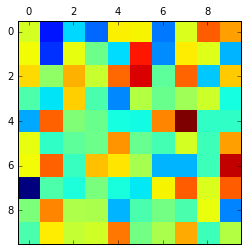

In [152]:
a  = pm.w_.sum(axis=0)
a = a.reshape(10,10)
#print a
plt.matshow(a)